<a href="https://colab.research.google.com/github/krutse/sim-git/blob/master/python/py_da/finalprj_py_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 150)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Проверка количества листов в книге
xl1 = pd.ExcelFile('./data/orders.xlsx')
xl2 = pd.ExcelFile('./data/products.xlsx')
# xlsx.parse
print(xl1.sheet_names, xl2.sheet_names)

['Лист1'] ['Лист1']


In [ ]:
# загрузка данных
df_products =  pd.read_excel('./data/products.xlsx', index_col=0).reset_index()
df_orders =  pd.read_excel('./data/orders.xlsx', index_col=0).reset_index()

In [ ]:
print(df_orders.shape, df_products.shape)

(3323, 7) (40152, 4)


In [ ]:

df_comb = df_orders.merge(df_products, how='inner', left_on='product_id', right_on='product_id')  #how='inner' - тогда останутся только строки где product_id есть в каждой таблице


In [ ]:
df_comb.isna().all() # проверка на наличие пустых значений

order_id         False
accepted_at      False
product_id       False
quantity         False
regular_price    False
price            False
cost_price       False
level1           False
level2           False
name             False
dtype: bool

In [ ]:
df_comb.head(3)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан


# Самая ходовая товарная группа
## По какой категории товаров продано больше всего позиций?

In [ ]:
df_cat = df_comb.groupby('level1')['quantity'].sum().sort_values(ascending=False).reset_index()
df_cat

,level1,quantity
0,Безалкогольные напитки,534
1,Молочная продукция,483
2,Свежие овощи,262
3,Кулинария,250
4,Бакалея,239
5,Хлеб и хлебобулочные изделия,218
6,Снэки,212
7,Свежие фрукты,184
8,Замороженная продукция,175
9,Кондитерские изделия,138


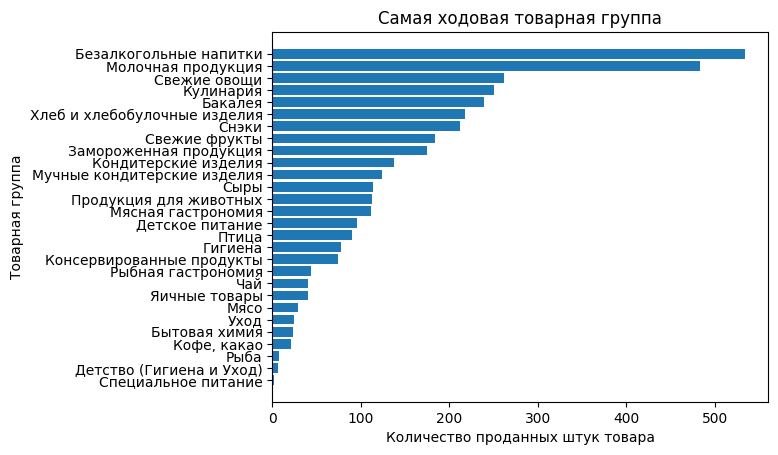

In [ ]:
df_cat = df_cat.sort_values(by=['quantity'], ascending=True)
plt.barh(df_cat['level1'], df_cat['quantity']);
plt.title('Самая ходовая товарная группа');
plt.xlabel('Количество проданных штук товара');
plt.ylabel('Товарная группа');


# Распределение продаж по подкатегориям

In [ ]:
df_subcat = df_comb.groupby(['level1', 'level2'])['quantity'].sum().reset_index()
df_subcat['l1_qty'] = df_subcat.groupby('level1')['quantity'].transform('sum')
df_subcat.sort_values(by=['l1_qty', 'quantity'], ascending=[False, False])


,level1,level2,quantity,l1_qty
13,Безалкогольные напитки,Напитки,252,534
12,Безалкогольные напитки,Воды питьевые,162,534
14,Безалкогольные напитки,Соковая продукция,82,534
11,Безалкогольные напитки,Воды минеральные,38,534
60,Молочная продукция,Молоко и сливки,147,483
61,Молочная продукция,Молочно-десертные продукты,116,483
57,Молочная продукция,Кисломолочные традиционные продукты,106,483
55,Молочная продукция,Йогурты,61,483
56,Молочная продукция,Кисломолочные современные продукты,26,483
58,Молочная продукция,Майонез,15,483


# Найти средний чек в заданную дату
## Какой средний чек был 13.01.2022?

In [ ]:

df_comb['l_price']= df_comb['quantity'] * df_comb['price'] # добавляем сумму по строке чека

df_ord = df_comb[df_comb['accepted_at'].dt.strftime('%Y-%m-%d') == '2022-01-13'].groupby('order_id').agg({'l_price': 'sum'}).mean() #.reset_index()

print(df_ord.iloc[0])

825.8835489833641


# Доля промо в заданной категории

In [ ]:
df_cheese = df_comb[(df_comb['level1'] == 'Сыры')].copy()
df_cheese['qty_promo'] = df_cheese.apply(lambda x: x['quantity'] if x['price']!=x['regular_price'] else 0, axis=1)
df_cheese['promo'] = df_cheese.apply(lambda x: 1 if x['price']!=x['regular_price'] else 0, axis=1)
df_cheese.head(3)
# Доля промо в штуках
df_cheese['qty_promo'].sum() / df_cheese['quantity'].sum()


0.30701754385964913

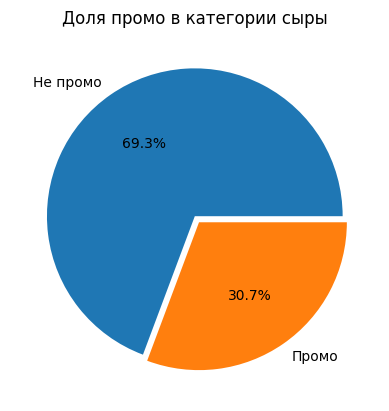

In [ ]:
# Пайчарт
df_pie = df_cheese.groupby('promo')['quantity'].sum().reset_index()

plt.title("Доля промо в категории сыры");
plt.pie(df_pie['quantity'], labels = ['Не промо', 'Промо'], explode=[0, 0.05], autopct='%.1f%%');

plt.show();

# Посчитать маржу по категориям

In [ ]:

df_gm_val = df_comb.groupby('level1').apply(lambda x: sum(x['quantity'] * (x['price'] - x['cost_price']))).sort_values().reset_index() # в рублях
df_gm_prc = df_comb.groupby('level1').apply(lambda x: sum(x['quantity'] * (x['price'] - x['cost_price']))/sum(x['quantity']*x['price'])*100.0).sort_values().reset_index() # в процентах

df_gm_prc.columns = ['Категория', 'GM%']
df_gm_val.columns = ['Категория', 'GM']
df_gm_prc
df_gm_val

C:\Users\serge\AppData\Local\Temp\ipykernel_21284\2717635366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gm_val = df_comb.groupby('level1').apply(lambda x: sum(x['quantity'] * (x['price'] - x['cost_price']))).sort_values().reset_index() # в рублях
C:\Users\serge\AppData\Local\Temp\ipykernel_21284\2717635366.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gm_prc = df_comb.groupby('level1').

,Категория,GM
0,Специальное питание,208
1,Детство (Гигиена и Уход),517
2,Яичные товары,781
3,Рыба,1021
4,Уход,1099
5,Продукция для животных,1113
6,Бытовая химия,1441
7,Детское питание,1817
8,Мясо,2150
9,Рыбная гастрономия,2765


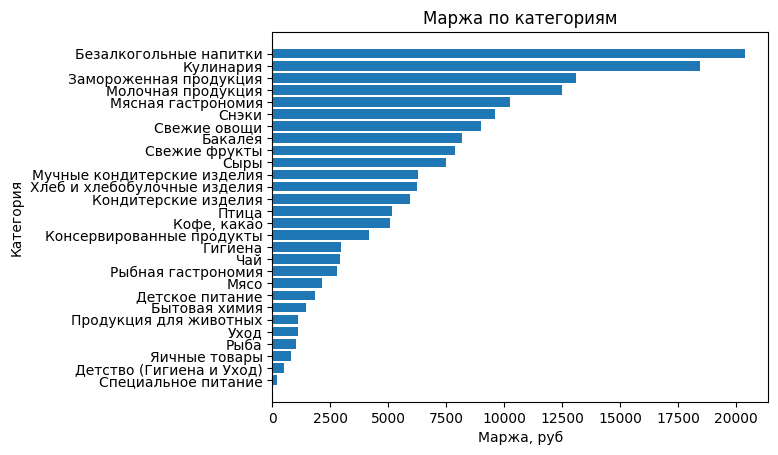

In [ ]:
plt.barh(df_gm_val['Категория'], df_gm_val['GM']);
plt.title('Маржа по категориям');
plt.xlabel('Маржа, руб');
plt.ylabel('Категория');


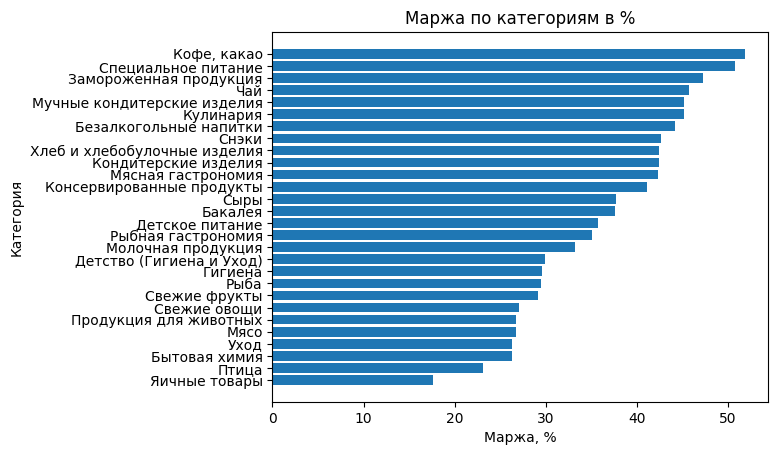

In [ ]:
plt.barh(df_gm_prc['Категория'], df_gm_prc['GM%']);
plt.title('Маржа по категориям в %');
plt.xlabel('Маржа, %');
plt.ylabel('Категория');

# ABC анализ

In [ ]:
df_acc = df_comb.groupby('level2').agg({'quantity' :'sum', 'l_price': 'sum'}).reset_index()

df_acc = df_acc.sort_values(by='quantity', ascending=False)
df_acc['q_acc'] = df_acc['quantity'].cumsum()

df_acc['q_abc'] = np.where(df_acc['q_acc']/df_acc['quantity'].sum() < 0.8, 'A', np.where(df_acc['q_acc']/df_acc['quantity'].sum() < 0.95 , 'B', 'C') )

df_acc = df_acc.sort_values(by='l_price', ascending=False)
df_acc['v_acc'] = df_acc['l_price'].cumsum()
df_acc['v_abc'] = np.where(df_acc['v_acc']/df_acc['l_price'].sum() < 0.8, 'A', np.where(df_acc['v_acc']/df_acc['l_price'].sum() < 0.95 , 'B', 'C') )

df_acc['qv_abc'] = df_acc['q_abc'] + df_acc['v_abc']

df_acc

,level2,quantity,l_price,q_acc,q_abc,v_acc,v_abc,qv_abc
10,Готовые блюда,248,40356,500,A,40356,A,AA
51,Напитки,252,24123,252,A,64479,A,AA
50,Мясо птицы охлажденное,90,22349,1993,A,86828,A,AA
85,"Тепличные овощи, грибы",105,18329,1799,A,105157,A,AA
72,Снэки соленые,180,17293,898,A,122450,A,AA
94,"Цитрусовые, семечковые и прочие плоды",108,16818,1588,A,139268,A,AA
18,Замороженные полуфабрикаты,73,15374,2382,A,154642,A,AA
40,Молоко и сливки,147,14902,1364,A,169544,A,AA
33,"Корнеплоды, зелень и прочие овощи",157,14893,1217,A,184437,A,AA
92,Хлеб и хлебобулочные изделия,218,14724,718,A,199161,A,AA
